# Getting Started with Qiskit

In [35]:
import qiskit

A simple Qiskit program to execute a circute and use Aer similuator. We have used qiskit.visualization for showing the results.


Total count for 00 and 11 are: {'00': 494, '11': 506}


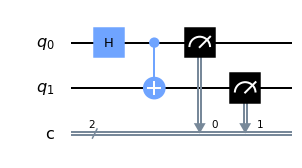

In [36]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
#Creating 2 bit circuit with 2 qubits and 2 classical bits.
circuit = QuantumCircuit(2, 2)

# Adding a Hadmard gate to the 0 qubit
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw(output = 'mpl')

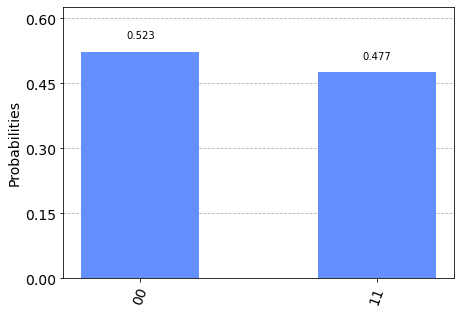

In [3]:
# Plot a histogram
plot_histogram(counts)

# Applying Different Gates to a single Qubit

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [6]:
q = QuantumRegister(1)

### Unitary Gate - U3 gate



$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$

In [7]:
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw()

┌────────────────────┐
q3_0: ┤ U3(pi/2,pi/2,pi/2) ├
      └────────────────────┘

In [9]:
job = execute(qc, backend)
job.result().get_unitary(qc)

array([[ 7.07106781e-01+0.00000000e+00j, -4.32978028e-17-7.07106781e-01j],
       [ 4.32978028e-17+7.07106781e-01j, -7.07106781e-01+8.65956056e-17j]])

### Unitary Gate - U2 Gate 

The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ 

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 &-e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

In [12]:
qc = QuantumCircuit(q)
qc.u2(pi/2,pi/2,q)
qc.draw()

┌───────────────┐
q3_0: ┤ U2(pi/2,pi/2) ├
      └───────────────┘

In [13]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 7.07106781e-01+0.00000000e+00j, -4.32978028e-17-7.07106781e-01j],
       [ 4.32978028e-17+7.07106781e-01j, -7.07106781e-01+8.65956056e-17j]])

### Identity Gate

$Id = u0(1)$

In [14]:
qc = QuantumCircuit(q)
qc.id(q)
qc.draw()

┌───┐
q3_0: ┤ I ├
      └───┘

In [15]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### X Bit - Flip Gate

$$
X   =  
\begin{pmatrix}
0  & 1\\
1  & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

In [21]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw()

┌───┐
q3_0: ┤ X ├
      └───┘

In [22]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.0000000e+00j, 1.-1.2246468e-16j],
       [1.+0.0000000e+00j, 0.+0.0000000e+00j]])

### Y Phase Flip Gate

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

In [23]:
qc = QuantumCircuit(q)
qc.y(q)
qc.draw()

┌───┐
q3_0: ┤ Y ├
      └───┘

In [24]:
job = execute(qc, backend)
job.result().get_unitary(qc)

array([[ 0.000000e+00+0.j, -6.123234e-17-1.j],
       [ 6.123234e-17+1.j,  0.000000e+00+0.j]])

### Z Phase Flip Gate

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

In [25]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw()

┌───┐
q3_0: ┤ Z ├
      └───┘

In [26]:
job = execute(qc, backend)
job.result().get_unitary(qc)

array([[ 1.+0.0000000e+00j,  0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j, -1.+1.2246468e-16j]])

### Hadmard Gate (H)

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

In [27]:
# Hadmard Gate
qc = QuantumCircuit(q)
qc.h(q)
qc.draw()

┌───┐
q3_0: ┤ H ├
      └───┘

In [28]:
job = execute(qc, backend)
job.result().get_unitary(qc)

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])

### S Gate

$$
S = 
\begin{pmatrix}
1 & 0\\
0  & i
\end{pmatrix}= u1(\pi/2)
$$

In [29]:
qc = QuantumCircuit(q)
qc.s(q)
qc.draw()

┌───┐
q3_0: ┤ S ├
      └───┘

In [30]:
job = execute(qc, backend)
job.result().get_unitary(qc)

array([[1.000000e+00+0.j, 0.000000e+00+0.j],
       [0.000000e+00+0.j, 6.123234e-17+1.j]])

### S* Gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$

In [31]:
qc = QuantumCircuit(q)
qc.sdg(q)
qc.draw()

┌─────┐
q3_0: ┤ SDG ├
      └─────┘

In [32]:
job = execute(qc, backend)
job.result().get_unitary(qc)

array([[1.000000e+00+0.j, 0.000000e+00+0.j],
       [0.000000e+00+0.j, 6.123234e-17-1.j]])

### Rotation 

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u3(\theta, -\pi/2,\pi/2)
$$

In [33]:
#Rotation Along X axis
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw()

┌──────────┐
q3_0: ┤ RX(pi/2) ├
      └──────────┘

In [34]:
job = execute(qc, backend)
job.result().get_unitary(qc)

array([[ 7.07106781e-01+0.j        , -4.32978028e-17-0.70710678j],
       [ 4.32978028e-17-0.70710678j,  7.07106781e-01+0.j        ]])